<a href="https://colab.research.google.com/github/SANGSEOSEO/philosophy_datascience/blob/master/%EA%B5%AD%EB%AF%BC%EC%97%B0%EA%B8%88%EC%9D%84_%ED%86%B5%ED%95%B4_%EB%B3%B8_COVID19%EC%97%90%EC%84%9C%EC%9D%98_%EC%9A%B0%EB%A6%AC%EA%B2%BD%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 국민연금을 통한 COVID19에서의 기업업종별 상황

- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

### 한글폰트 안깨지게 실행

In [ ]:
# 1. 먼저 실행
!sudo apt-get install -y fonts-nanum  # 한글 폰트 실행
!sudo fc-cache -fv  # 나눔폰트
!rm ~/.cache/matplotlib -rf  # 캐쉬 삭제

# 2. 런타임 --> 런타임 다시 시작 

In [2]:
# 3. 실행 한번 해주고 .
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')   # 시스템 설정 : 폰트 패밀리 - 나눔바른폰트
plt.rcParams['figure.figsize'] = (12, 9)

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
df = pd.read_csv('/content/sample_data/national_pension_20200824.csv', encoding='CP949')
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

###컬럼 정보 정리

In [70]:
# rename으로 하기엔 많아서 컬럼명 간소화시킴
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',
          ]
df.columns = columns          

##비대면 - IT업종 국민연금 데이터 추출

In [71]:
# IT업종
df_IT = df[df['업종코드'].isin([biz for biz in df['업종코드'] if str(biz).startswith('72') | str(biz).startswith('64')])]
df_IT.columns = columns
df_IT = df_IT[['자료생성년월', '사업장명', '사업장형태', '시군구코드', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액']]

## 컬럼정보

In [ ]:
# 대략적인 컬럼을 보고 
df.info()

In [ ]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [ ]:
df.loc[df['업종코드명'].isna()]
df.loc[df['고지금액'].isnull()]

##분석 대상 데이터 정의 및 추출


*   업종코드는 [기준경비율 단순경비율 - 국세청](https://www.nts.go.kr/wtsnts_skin/board_skin/mdl/mdlFileDown.asp?minfoKey=MINF6920080211211738&key=401347)  참조함.



In [ ]:
# 일반 for..loop
# for biz in df['업종코드']:
#   if str(biz).startswith('940'):
#     print(biz)

In [18]:
# 1.분석하고자 하는 대상건 DataFrame생성 

#1.1 대면서비스 업종 
# 이용업,미용,마사지,욕탕,세탁,장례식,결혼,상담
df_contact = df[(df['업종코드'].isin([biz for biz in df['업종코드'] if str(biz).startswith('940') 
                                                                         | str(biz).startswith('92') 
                                                                         | str(biz).startswith('93')
                                                                         | str(biz).startswith('80')
                                                                         | str(biz).startswith('73')
                                                                         | str(biz).startswith('74')
                                                                         | str(biz).startswith('63')
                                                                         | str(biz).startswith('71')
                                                                          | str(biz).startswith('551')  
                                                                          | str(biz).startswith('552')  
                                                                          | str(biz).startswith('60') 
                                                                         | str(biz).startswith('61')
                                                                         | str(biz).startswith('62')
                                                                        | str(biz).startswith('52')
                                                                         ]))]
df_contact.sort_values(by='상실', ascending=False)                                                                         

# # 부동산관련 
# df_realest = df[(df['업종코드'].isin([biz for biz in df['업종코드'] if str(biz).startswith('65') 
#                                                                         | str(biz).startswith('66') 
#                                                                         | str(biz).startswith('67')
#                                                                         | str(biz).startswith('70')
#                                                                         ]))]
# df_realest[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액']].sort_values(by='상실', ascending=False)

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
4519,202007,(주)모두투어네트워크,202814,1,4533,서울특별시 중구 을지로1가,서울특별시 중구 을지로,1114010400,1114055000,11.00,140.00,104.00,1.00,630600,여행사업,19890901.00,10101.00,10101.00,867.00,195684780.00,240.00,760.00
358,202007,(주)삼구아이앤씨,118811,1,4542,서울특별시 중구 수표동,서울특별시 중구 청계천로,1114011000,1114055000,11.00,140.00,110.00,1.00,749300,건축물 일반 청소업,19880101.00,10101.00,10101.00,10272.00,2669762420.00,333.00,338.00
3228,202007,대한해운(주),101812,1,7803,서울특별시 강서구 마곡동,서울특별시 강서구 마곡중앙8로,1150010500,1150000000,11.00,500.00,105.00,1.00,611002,외항 화물 운송업,19880101.00,10101.00,10101.00,432.00,172549600.00,9.00,293.00
3665,202007,롯데지알에스(주),106812,1,4322,서울특별시 용산구 갈월동,서울특별시 용산구 한강대로71길,1117010400,1117053000,11.00,170.00,104.00,1.00,552107,치킨 전문점,19880101.00,10101.00,10101.00,3020.00,694568540.00,190.00,169.00
3460,202007,(주)GS리테일,116811,1,6141,서울특별시 강남구 역삼동,서울특별시 강남구 논현로,1168010100,1168064000,11.00,680.00,101.00,1.00,521992,체인화 편의점,19880101.00,10101.00,10101.00,6774.00,1862765000.00,86.00,168.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,202007,(주)새한렌트카,119811,1,4510,서울특별시 중구 중림동,서울특별시 중구 청파로,1114017100,1114068000,11.00,140.00,171.00,1.00,630304,자동차 임대업(렌트카),19880101.00,10101.00,10101.00,6.00,1144480.00,0.00,0.00
2729,202007,내외종합건축사무소(주),213813,1,6303,서울특별시 강남구 개포동,서울특별시 강남구 개포로15길,1168010300,1168069000,11.00,680.00,103.00,1.00,742103,건축 설계 및 관련 서비스업,19880101.00,10101.00,10101.00,17.00,5134960.00,0.00,0.00
2740,202007,진양가스(주),213810,1,6260,서울특별시 강남구 도곡동,서울특별시 강남구 도곡로,1168011800,1168065500,11.00,680.00,118.00,1.00,523630,가정용 가스 연료 소매업,19880101.00,10101.00,10101.00,10.00,2458720.00,0.00,0.00
2753,202007,선샤인(주),211811,1,6026,서울특별시 강남구 신사동,서울특별시 강남구 도산대로,1168010700,1168051000,11.00,680.00,107.00,1.00,551001,호텔업,19880101.00,10101.00,10101.00,19.00,4375540.00,0.00,0.00


## 대면서비스가 중심인 업종

#### 대면서비스 업종에 대한 예측
- COVID19로 인해 뉴스보도나 전세계 발 경제상황을 보더라도 여행,유통, 항공 업계가 타격이 클것으로 예측 
  * 예측에 대한 검증을 국민연금 데이터 대면서비스 업종의 국민연금 자격 상실 통계치를 통해 검증하고자 함
  * 기업체의 고지금액과 상실간의 관계는 어떠한지 확인

###대면서비스 업종 - 상실

In [19]:
df_contact['인당고지금액'] = df_contact['고지금액'] / df_contact['가입자수']
df_contact['평균월급'] = df_contact['고지금액'] / 9 * 100
df_contact['평균연봉'] = df_contact['평균월급'] * 12

In [23]:
df_contact[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액', '인당고지금액', '평균월급', '평균연봉']].sort_values(by='상실', ascending=False).head(25)

,자료생성년월,사업장명,사업장형태,업종코드명,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액,평균월급,평균연봉
4519,202007,(주)모두투어네트워크,1.00,여행사업,19890901.00,10101.00,1,240.00,760.00,867.00,195684780.00,225703.32,2174275333.33,26091304000.00
358,202007,(주)삼구아이앤씨,1.00,건축물 일반 청소업,19880101.00,10101.00,1,333.00,338.00,10272.00,2669762420.00,259906.78,29664026888.89,355968322666.67
3228,202007,대한해운(주),1.00,외항 화물 운송업,19880101.00,10101.00,1,9.00,293.00,432.00,172549600.00,399420.37,1917217777.78,23006613333.33
3665,202007,롯데지알에스(주),1.00,치킨 전문점,19880101.00,10101.00,1,190.00,169.00,3020.00,694568540.00,229989.58,7717428222.22,92609138666.67
3460,202007,(주)GS리테일,1.00,체인화 편의점,19880101.00,10101.00,1,86.00,168.00,6774.00,1862765000.00,274987.45,20697388888.89,248368666666.67
2555,202007,(주)현대그린푸드,1.00,백화점,19880101.00,10101.00,1,182.00,165.00,5686.00,1530793880.00,269221.58,17008820888.89,204105850666.67
3659,202007,대한항공(주),1.00,항공 여객 운송업,19880101.00,10101.00,1,465.00,159.00,18801.00,7919204420.00,421211.87,87991160222.22,1055893922666.67
3352,202007,롯데쇼핑(주),1.00,백화점,19880101.00,10101.00,1,104.00,144.00,5427.00,1889117480.00,348096.09,20990194222.22,251882330666.67
643,202007,(주)아이비에스인더스트리,1.00,건축물 일반 청소업,19880101.00,10101.00,1,158.00,143.00,3284.00,697665320.00,212443.76,7751836888.89,93022042666.67
723,202007,(주)제이앤비컨설팅,1.00,고용 알선업,19980810.00,10101.00,1,98.00,121.00,1669.00,299282780.00,179318.62,3325364222.22,39904370666.67


<Figure size 720x504 with 0 Axes>

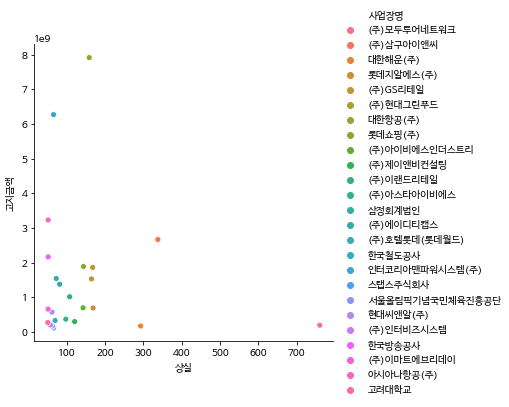

In [24]:
ds_cntct =df_contact[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액', '인당고지금액', '평균월급', '평균연봉']].sort_values(by='상실', ascending=False).head(25)
plt.figure(figsize=(10, 7))
sns.relplot(x='상실', y='고지금액', data=ds_cntct, hue='사업장명')
plt.show()

- 가장 상실이 많은 업종은 여행업체와 (주)삼구아이엔씨와 같은 인력소싱업체,유통,항공업체 순으로 파악이됨.
- 그래프를 볼때 상실과 고지금액간의 관계는 기업체의 연봉 및 급여수준에 따라 정확하게 선형적으로 증가하지는 않음.즉, 평균연봉 수준이 낮고 ,국민연금 자격 상실한 수가 많더라도 고지금액은 낮을수도 있고, 평균연봉 수준이 높고, 국민연금 자격 상실수가 많지 않더라도 고지금액은 상대적으로 높을수 있다.

###대면서비스 - 신규

In [25]:
# 상위 20
ds_cntN = df_contact[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액', '인당고지금액', '평균월급', '평균연봉']].sort_values(by='신규', ascending=False).head(20)

In [27]:
ds_cntN

,자료생성년월,사업장명,사업장형태,업종코드명,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액,평균월급,평균연봉
3659,202007,대한항공(주),1.00,항공 여객 운송업,19880101.00,10101.00,1,465.00,159.00,18801.00,7919204420.00,421211.87,87991160222.22,1055893922666.67
358,202007,(주)삼구아이앤씨,1.00,건축물 일반 청소업,19880101.00,10101.00,1,333.00,338.00,10272.00,2669762420.00,259906.78,29664026888.89,355968322666.67
4519,202007,(주)모두투어네트워크,1.00,여행사업,19890901.00,10101.00,1,240.00,760.00,867.00,195684780.00,225703.32,2174275333.33,26091304000.00
3665,202007,롯데지알에스(주),1.00,치킨 전문점,19880101.00,10101.00,1,190.00,169.00,3020.00,694568540.00,229989.58,7717428222.22,92609138666.67
3707,202007,한국전기안전공사,1.00,기타 엔지니어링 서비스업,19880101.00,10101.00,1,189.00,17.00,3202.00,1153380480.00,360206.27,12815338666.67,153784064000.00
2555,202007,(주)현대그린푸드,1.00,백화점,19880101.00,10101.00,1,182.00,165.00,5686.00,1530793880.00,269221.58,17008820888.89,204105850666.67
643,202007,(주)아이비에스인더스트리,1.00,건축물 일반 청소업,19880101.00,10101.00,1,158.00,143.00,3284.00,697665320.00,212443.76,7751836888.89,93022042666.67
4313,202007,(주)인터비즈시스템,1.00,고용 알선업,19890301.00,10101.00,1,156.00,58.00,1046.00,203744920.00,194784.82,2263832444.44,27165989333.33
1305,202007,(주)신세계조선호텔,1.00,호텔업,19880101.00,10101.00,1,151.00,46.00,1494.00,445045220.00,297888.37,4944946888.89,59339362666.67
4651,202007,하나투어(주),1.00,여행사업,19931201.00,10101.00,1,143.00,35.00,488.00,159012840.00,325845.98,1766809333.33,21201712000.00


<Figure size 720x504 with 0 Axes>

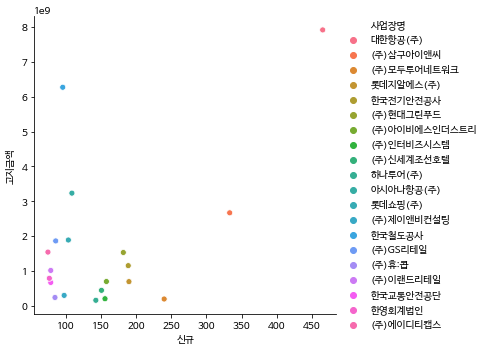

In [26]:
plt.figure(figsize=(10, 7))
sns.relplot(x='신규', y='고지금액', data=ds_cntN, hue='사업장명')
plt.show()

- 대한항공의 경우, [관련 기사](https://biz.chosun.com/site/data/html_dir/2020/09/24/2020092401570.html?utm_source=naver&utm_medium=original&utm_campaign=biz)를 통해 볼때 유휴여객기의 화물여객기로 전환으로 고용효과가 있지 않았나 하는 추론이 가능.

In [ ]:
df_IT['사업장명'] = df_IT['사업장명'].apply(text_preprocess)

## 비대면 서비스 업종 - IT업종 중심

### 신규 DataFrame컬럼 설정 

In [ ]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]

###월급, 연봉 추정

In [88]:
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df_IT['인당고지금액'] = df['고지금액'] / df['가입자수']

###데이터에 대한  통계치 확인

In [39]:
df_IT.describe()

,자료생성년월,사업장형태,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액
count,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17516.00
mean,202007.00,1.00,20126929.91,366813.81,1.02,0.94,0.73,26.21,8199009.75,260656.74
std,0.00,0.00,66722.32,2659842.37,0.13,7.11,5.80,254.06,102646242.06,76089.77
min,202007.00,1.00,19880101.00,10101.00,1.00,0.00,0.00,0.00,0.00,28800.00
25%,202007.00,1.00,20080714.00,10101.00,1.00,0.00,0.00,4.00,974235.00,207832.38
50%,202007.00,1.00,20150914.00,10101.00,1.00,0.00,0.00,7.00,1824690.00,261278.49
75%,202007.00,1.00,20180601.00,10101.00,1.00,1.00,1.00,15.00,4109605.00,312270.68
max,202007.00,1.00,20200713.00,20200730.00,2.00,525.00,366.00,22527.00,9961182900.00,452700.00


In [40]:
df_IT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17828 entries, 135 to 515784
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자료생성년월  17828 non-null  int64  
 1   사업장명    17828 non-null  object 
 2   사업장형태   17828 non-null  int64  
 3   업종코드명   17828 non-null  object 
 4   적용일     17828 non-null  int64  
 5   탈퇴일     17828 non-null  int64  
 6   가입상태    17828 non-null  int64  
 7   신규      17828 non-null  int64  
 8   상실      17828 non-null  int64  
 9   가입자수    17828 non-null  int64  
 10  고지금액    17828 non-null  int64  
 11  인당고지금액  17516 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.8+ MB


In [41]:
df_IT['상실'].mean(), df_IT['신규'].mean(), df_IT['가입자수'].mean(), df_IT['고지금액'].mean()

(0.733901727619475, 0.9437401839802558, 26.21359658963428, 8199009.750953556)

In [42]:
# 총 24070개 
df_IT['사업장명'].value_counts()
df_IT.head()

,자료생성년월,사업장명,사업장형태,업종코드명,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액
135,202007,대신정보통신(주),1,응용 소프트웨어 개발 및 공급업,19880101,10101,1,12,17,555,179306000,323073.87
199,202007,(주)비트컴퓨터,1,응용 소프트웨어 개발 및 공급업,19880101,10101,1,1,3,137,41544740,303246.28
212,202007,한국후지쯔(주),1,응용 소프트웨어 개발 및 공급업,19880101,10101,1,1,1,181,76397920,422087.96
678,202007,(주)제이.티.에스,1,응용 소프트웨어 개발 및 공급업,19880101,10101,1,0,0,7,1875040,267862.86
684,202007,(주)코스콤,1,자료 처리업,19880101,10101,1,8,2,744,332258180,446583.58


In [43]:
df_IT.groupby(by=['신규']).mean()

,자료생성년월,사업장형태,적용일,탈퇴일,가입상태,상실,가입자수,고지금액,인당고지금액
신규,,,,,,,,,
0,202007.00,1.00,20128497.22,514179.03,1.02,0.30,10.05,2825960.68,258499.48
1,202007.00,1.00,20127934.24,10101.00,1.00,0.60,20.58,5963927.23,261432.43
2,202007.00,1.00,20124849.02,30271.44,1.00,1.02,35.61,10922155.04,268641.90
3,202007.00,1.00,20126118.06,10101.00,1.00,1.13,41.48,12590403.01,261556.23
4,202007.00,1.00,20124027.11,10101.00,1.00,1.68,62.50,19523037.97,268854.25
...,...,...,...,...,...,...,...,...,...
182,202007.00,1.00,20021201.00,10101.00,1.00,139.00,1605.00,305729900.00,190485.92
199,202007.00,1.00,20010702.00,10101.00,1.00,225.00,7899.00,1753229620.00,221955.90
267,202007.00,1.00,20010702.00,10101.00,1.00,212.00,7852.00,1780002840.00,226694.20


In [44]:
df_IT.describe()

,자료생성년월,사업장형태,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액
count,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17828.00,17516.00
mean,202007.00,1.00,20126929.91,366813.81,1.02,0.94,0.73,26.21,8199009.75,260656.74
std,0.00,0.00,66722.32,2659842.37,0.13,7.11,5.80,254.06,102646242.06,76089.77
min,202007.00,1.00,19880101.00,10101.00,1.00,0.00,0.00,0.00,0.00,28800.00
25%,202007.00,1.00,20080714.00,10101.00,1.00,0.00,0.00,4.00,974235.00,207832.38
50%,202007.00,1.00,20150914.00,10101.00,1.00,0.00,0.00,7.00,1824690.00,261278.49
75%,202007.00,1.00,20180601.00,10101.00,1.00,1.00,1.00,15.00,4109605.00,312270.68
max,202007.00,1.00,20200713.00,20200730.00,2.00,525.00,366.00,22527.00,9961182900.00,452700.00


In [45]:
df_IT['신규'].mean()

0.9437401839802558

In [46]:
df_IT['상실'].mean()

0.733901727619475

In [47]:
df_IT['가입자수'].mean()

26.21359658963428

In [48]:
df_IT['고지금액'].mean()

8199009.750953556

In [49]:
df_IT[['사업장명', '가입자수', '신규', '상실', '고지금액', '인당고지금액']].head()

,사업장명,가입자수,신규,상실,고지금액,인당고지금액
135,대신정보통신(주),555,12,17,179306000,323073.87
199,(주)비트컴퓨터,137,1,3,41544740,303246.28
212,한국후지쯔(주),181,1,1,76397920,422087.96
678,(주)제이.티.에스,7,0,0,1875040,267862.86
684,(주)코스콤,744,8,2,332258180,446583.58


**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [90]:
df_IT['평균월급'] = df_IT['인당고지금액'] / 9 * 100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [51]:
df_IT['평균연봉'] = df_IT['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [52]:
df_IT['평균월급'].notnull().sum()

17516

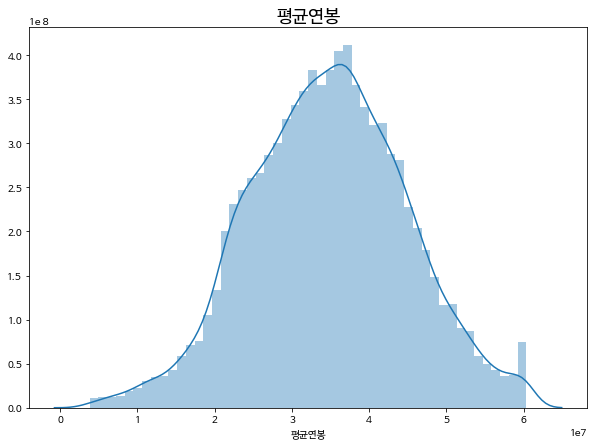

In [53]:
plt.figure(figsize=(10, 7))
sns.distplot(df_IT.loc[df_IT['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

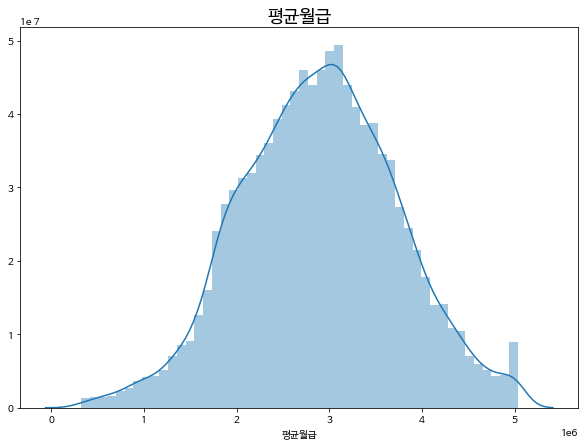

In [54]:
plt.figure(figsize=(10, 7))
sns.distplot(df_IT.loc[df_IT['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

### 정렬(Order)

#### IT업종 연봉 King!

In [55]:
# 가입자수를 정렬하면 자동적으로 연봉킹이 나오지.
df_IT.sort_values(by='가입자수' , ascending=False)

,자료생성년월,사업장명,사업장형태,업종코드명,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액,평균월급,평균연봉
3479,202007,주식회사 케이티,1,무선 및 위성 통신업,19880101,10101,1,15,76,22527,9961182900,442188.61,4913206.82,58958481.82
3670,202007,삼성에스디에스(주),1,응용 소프트웨어 개발 및 공급업,19880101,10101,1,27,48,12504,5614601680,449024.45,4989160.52,59869926.21
39505,202007,(주)엘지유플러스,1,무선 및 위성 통신업,19960801,10101,1,77,88,10223,4142808860,405243.95,4502710.51,54032526.13
12843,202007,(주)케이티아이에스,1,무선 및 위성 통신업,20010702,10101,1,199,225,7899,1753229620,221955.90,2466176.62,29594119.42
121174,202007,(주)케이티씨에스,1,데이터베이스 및 온라인 정보 제공업,20010702,10101,1,267,212,7852,1780002840,226694.20,2518824.42,30225893.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331071,202007,주식회사 커먼센스,1,응용 소프트웨어 개발 및 공급업,20160701,20200720,2,0,1,0,0,nan,nan,nan
455736,202007,주식회사비씨이엑스솔루션즈(BCEXSolutionsCo. Ltd),1,응용 소프트웨어 개발 및 공급업,20190901,20200701,2,0,0,0,0,nan,nan,nan
330479,202007,미소주식회사,1,컴퓨터 및 주변 기기 수리업,20160701,20171226,2,0,0,0,0,nan,nan,nan
456515,202007,스테이지포주식회사,1,기타 정보 기술 및 컴퓨터 운영 관련 서비스업,20190715,20200301,2,0,1,0,0,nan,nan,nan


####IT업종 신규 채용 King!

In [58]:
# Top 20
df_hire= df_IT.sort_values(by='신규', ascending=False).head(n=20)

In [57]:
df_hire

,자료생성년월,사업장명,사업장형태,업종코드명,적용일,탈퇴일,가입상태,신규,상실,가입자수,고지금액,인당고지금액,평균월급,평균연봉
7289,202007,(주)메타넷엠플랫폼,1,데이터베이스 및 온라인 정보 제공업,19990804,10101,1,525,358,6825,1203745080,176372.91,1959698.95,23516387.40
299460,202007,주식회사우아한청년들,1,자료 처리업,20150706,10101,1,482,202,1325,234346980,176865.65,1965173.84,23582086.04
121174,202007,(주)케이티씨에스,1,데이터베이스 및 온라인 정보 제공업,20010702,10101,1,267,212,7852,1780002840,226694.20,2518824.42,30225893.02
12843,202007,(주)케이티아이에스,1,무선 및 위성 통신업,20010702,10101,1,199,225,7899,1753229620,221955.90,2466176.62,29594119.42
19133,202007,에이스휴먼파워(주),1,응용 소프트웨어 개발 및 공급업,20021201,10101,1,182,139,1605,305729900,190485.92,2116510.21,25398122.53
62009,202007,주식회사 카카오,1,데이터베이스 및 온라인 정보 제공업,19951227,10101,1,161,40,2689,1024595200,381032.06,4233689.52,50804274.20
8481,202007,SK 엠앤서비스(주),1,응용 소프트웨어 개발 및 공급업,20000210,10101,1,138,112,1686,405743440,240654.47,2673938.58,32087262.95
512414,202007,주식회사 브이엔티지,1,컴퓨터 시스템 통합 자문 및 구축 서비스업,20200601,10101,1,132,2,132,48018980,363780.15,4042001.68,48504020.20
513276,202007,엔에이치엔토스트주식회사,1,기타 정보 기술 및 컴퓨터 운영 관련 서비스업,20200701,10101,1,128,2,128,33555960,262155.94,2912843.75,34954125.00
7164,202007,네이버 주식회사,1,데이터베이스 및 온라인 정보 제공업,19990629,10101,1,115,58,3709,1585990320,427605.91,4751176.78,57014121.33


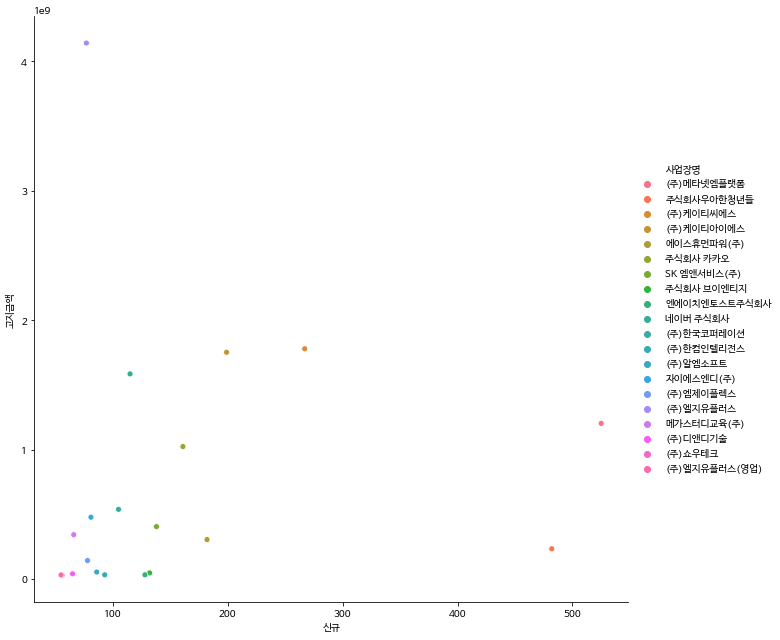

In [59]:
# 비대면 서비스의 수요로 인해 신규채용의 선두자리에 (주)메타엠플랫폼 업체 - 콜센터업무 비대면업무로 이루어지는 전문업체- 가 있는것이 눈에 띔.
# 네이버가 다른 사업장에 비해 신규 채용인원은 적지만 급여수준은 높은 것을 알수 있다.
# 반면 배달의 민족으로 대표되는 우아한 청년들이 경우엔 신규 채용인원은 많지만 고지금액은 많지 않은것으로 봐서
# 급여수준이 좀 낮는 부분에 채용이 집중되지 않았을까하는 추론을 하게됨.
plt.rcParams['figure.figsize'] = (12, 9)
sns.relplot(x='신규', y='고지금액', data=df_hire, hue='사업장명', height=9)
plt.show()

####IT업종 상실 King!

In [62]:
# 네입버웹툰컴퍼니가 `국민연금 상실`이 top으로 올라와있는데 네이버에서 웹툰 분사는 2020년 8월1일부로 
# 분사하여 대규모 퇴사 및 입사가 이루어진것으로 확인됨.
# Top 20
df_laidoff = df_IT.sort_values(by='상실', ascending=False).head(20)

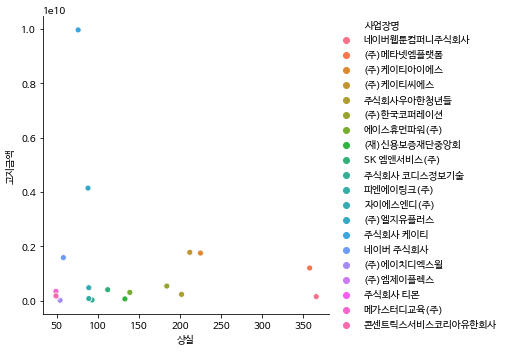

In [63]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.relplot(x='상실', y='고지금액', data=df_laidoff, hue='사업장명', height=5)
plt.show()

(주)메타넷엠플랫폼의 경우, 신규 만큼 상실인원도 많은것으로 파악됨.(HR쪽의 고민이 필요해 보임0

###110인 이하 기업

In [ ]:
people_limit = 110

In [ ]:
small = df_IT.loc[(df_IT['가입자수'].notnull()) & (df_IT['가입자수'] < people_limit )].sort_values(by='가입자수', ascending=False)
small.head(n=20)

###300인 이상 기업

In [ ]:
big = 300

In [ ]:
# 300인 이상의 기업
big_company = df_IT.loc[(df_IT['가입자수'].notnull()) & (df_IT['가입자수'] >= big )].sort_values(by='가입자수', ascending=False)
big_company.head()

In [ ]:
small['가입자수'].isnull().sum()

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

In [ ]:
small.sort_values(by='상실', ascending=False)

## 사업장명 데이터 정제 (Cleansing)

In [101]:
import re

# 괄호안 문자열 제거
pattern_1 = '\(.*\)'
pattern_2 = '\（.*\）'
pattern_3 = '주식회사'



### (주), (주식회사) 문자열 제거

In [ ]:
re.sub(pattern_1, '', '브레인크루(주)')

In [ ]:
re.sub(pattern_1, '', '브레인크루(주식회사)')

In [ ]:
re.sub(pattern_1, '', '(주)브레인크루')

In [ ]:
re.sub(pattern_2, '', '（주）타워홀딩스')

### 주식회사 문자열 제거

In [ ]:
re.sub(pattern_2, '', '브레인크루 주식회사')

In [ ]:
re.sub(pattern_2, '', '브레인크루주식회사')

In [ ]:
re.sub(pattern_2, '', '주식회사브레인크루주식회사')

In [102]:
def text_preprocess(text):
    text = re.sub(pattern_1, '', text)
    text = re.sub(pattern_2, '', text)
    text = re.sub(pattern_3, '', text)
    return text

In [ ]:
df_main['사업장명'] = df_main['사업장명'].apply(text_preprocess)

In [ ]:
df_main[df_main['사업장명'] == '패스트캠퍼스']

In [105]:
df['사업장명'] = df['사업장명'].apply(text_preprocess)

In [104]:
df_IT['사업장명'] = df_IT['사업장명'].apply(text_preprocess)

In [ ]:
df.columns

## 시군구별 확인

In [80]:
# 신군구정보 
url = "http://sgis.kostat.go.kr/OpenAPI2/upload/unitarea_code.xls"
df_postal = pd.read_excel(url,skiprows=1)
df_postal.head()

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,11010,종로구,1101053,사직동
1,11,서울특별시,11010,종로구,1101054,삼청동
2,11,서울특별시,11010,종로구,1101055,부암동
3,11,서울특별시,11010,종로구,1101056,평창동
4,11,서울특별시,11010,종로구,1101057,무악동


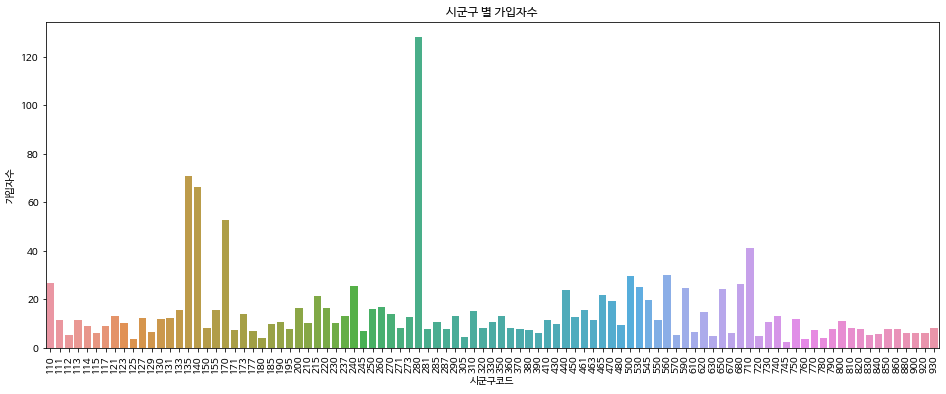

In [72]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_IT.groupby('시군구코드')['가입자수'].mean().index, y=df_IT.groupby('시군구코드')['가입자수'].mean())
plt.title('시군구 별 가입자수')
plt.xticks(rotation=90)
plt.show()

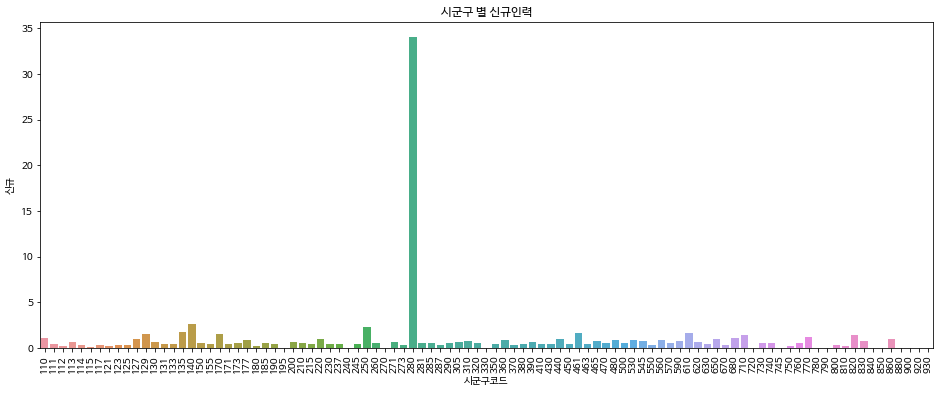

In [73]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_IT.groupby('시군구코드')['신규'].mean().index, y=df_IT.groupby('시군구코드')['신규'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

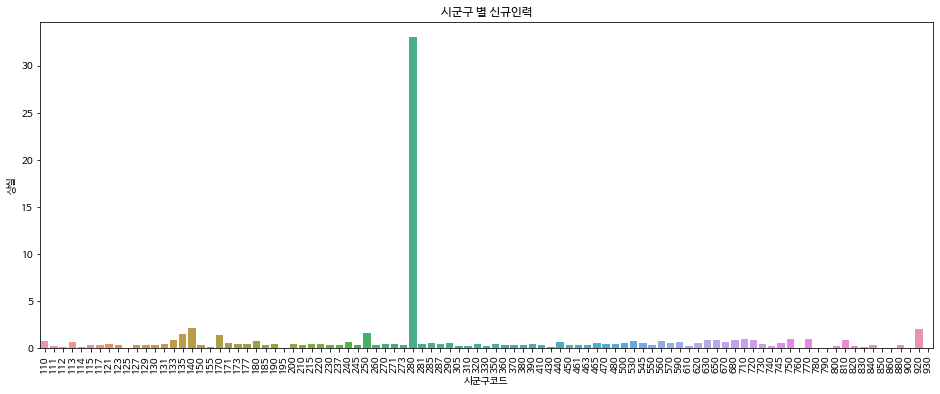

In [74]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_IT.groupby('시군구코드')['상실'].mean().index, y=df_IT.groupby('시군구코드')['상실'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

### 신규 인력이 많은 시군구코드

**경기도 평택시**에서 최근 국민연금 가입자 신규인력이 가장 많이 발생했음

주로 건축 인력 혹은 건설사 인력들이 신규로 편입되면서 국민연금 가입자 발생이 가장 많이 일어난 것으로 집계 됐다.

In [28]:
df.loc[df['시군구코드'] == 280][['사업장명','지번주소','신규']].sort_values(by='신규', ascending=False).head(20)

,사업장명,지번주소,신규


**모두투어네트워크**에서 가장 많은 상실 인력이 발생했다.

스타브벅스커피코리아(주) 및 콜센터 및 상담업체 (주)메낱넷엠플랫폼,(주)삼구아이씨_인력소싱업체 주로 IT업종에서 대면서비스가 이루어지는 업종인 경우에는 실직자가 다량으로 발생한것으로 보인다.

In [ ]:
df.loc[df['시군구코드'] == 140][['사업장명','지번주소','상실']].sort_values(by='상실', ascending=False).head(20)

,사업장명,지번주소,상실
4519,(주)모두투어네트워크,서울특별시 중구 을지로1가,760
5288,스타벅스커피코리아(주),서울특별시 중구 소공동,518
7289,(주)메타넷엠플랫폼,서울특별시 중구 충무로2가,358
358,(주)삼구아이앤씨,서울특별시 중구 수표동,338
503301,동구청/경제지원과/방역 및 기타,대구광역시 동구 신암동,236
97612,씨제이제일제당（주）,서울특별시 중구 쌍림동,204
3471,중소기업은행,서울특별시 중구 을지로2가,192
220405,농협은행주식회사,서울특별시 중구 충정로1가,186
61748,(주)한국코퍼레이션,서울특별시 중구 남대문로5가,184
3567,(주)신한은행,서울특별시 중구 태평로2가,171


## IT업종별 신규/상실 인력 현황

In [ ]:
df_IT.groupby('업종코드명')['신규'].mean()

업종코드명
공영 우편업                      0.82
그 외 기타 전기 통신업               0.47
그 외 기타 정보 서비스업              0.94
기타 게임 소프트웨어 개발 및 공급업        1.00
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   1.35
뉴스 제공업                      0.67
데이터베이스 및 온라인 정보 제공업         1.72
모바일 게임 소프트웨어 개발 및 공급업       1.41
무선 및 위성 통신업                 4.69
시스템 소프트웨어 개발 및 공급업          0.89
유선 온라인 게임 소프트웨어 개발 및 공급업    3.03
유선 통신업                      0.33
응용 소프트웨어 개발 및 공급업           0.79
자료 처리업                      4.21
컴퓨터 및 주변 기기 수리업             0.92
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.76
컴퓨터 프로그래밍 서비스업              0.77
컴퓨터시설 관리업                   0.86
택배업                         0.44
통신 재판매업                     0.92
포털 및 기타 인터넷 정보 매개 서비스업      0.66
호스팅 및 관련 서비스업               0.00
Name: 신규, dtype: float64

In [ ]:
df_1 =df_IT.groupby('업종코드명')['신규'].mean()

In [ ]:
df_2 =df_IT.groupby('업종코드명')['상실'].mean()

업종코드명
공영 우편업                      0.94
그 외 기타 전기 통신업               0.44
그 외 기타 정보 서비스업              0.22
기타 게임 소프트웨어 개발 및 공급업        0.55
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   0.59
뉴스 제공업                      0.75
데이터베이스 및 온라인 정보 제공업         1.44
모바일 게임 소프트웨어 개발 및 공급업       0.12
무선 및 위성 통신업                 5.86
시스템 소프트웨어 개발 및 공급업          0.26
유선 온라인 게임 소프트웨어 개발 및 공급업    0.23
유선 통신업                      0.33
응용 소프트웨어 개발 및 공급업           0.62
자료 처리업                      1.99
컴퓨터 및 주변 기기 수리업             1.17
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.48
컴퓨터 프로그래밍 서비스업              0.32
컴퓨터시설 관리업                   0.14
택배업                         0.24
통신 재판매업                     0.99
포털 및 기타 인터넷 정보 매개 서비스업      0.56
호스팅 및 관련 서비스업               0.00
Name: 상실, dtype: float64

In [ ]:
df_1.sort_values(ascending=False).count()

22

In [ ]:
df_2.sort_values(ascending=False).count()

22

상위 50 개 **업종** 출력하도록 하겠습니다.

In [ ]:
df_top100 = df_1.sort_values(ascending=False).head(50)
df_top100

업종코드명
무선 및 위성 통신업                 4.69
자료 처리업                      4.21
유선 온라인 게임 소프트웨어 개발 및 공급업    3.03
데이터베이스 및 온라인 정보 제공업         1.72
모바일 게임 소프트웨어 개발 및 공급업       1.41
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   1.35
기타 게임 소프트웨어 개발 및 공급업        1.00
그 외 기타 정보 서비스업              0.94
컴퓨터 및 주변 기기 수리업             0.92
통신 재판매업                     0.92
시스템 소프트웨어 개발 및 공급업          0.89
컴퓨터시설 관리업                   0.86
공영 우편업                      0.82
응용 소프트웨어 개발 및 공급업           0.79
컴퓨터 프로그래밍 서비스업              0.77
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.76
뉴스 제공업                      0.67
포털 및 기타 인터넷 정보 매개 서비스업      0.66
그 외 기타 전기 통신업               0.47
택배업                         0.44
유선 통신업                      0.33
호스팅 및 관련 서비스업               0.00
Name: 신규, dtype: float64

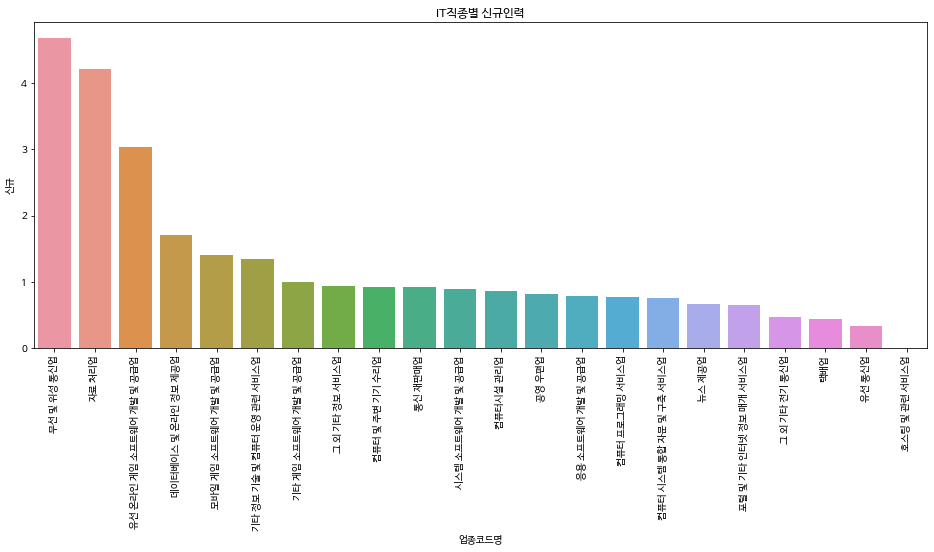

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('IT직종별 신규인력')
plt.xticks(rotation=90)
plt.show()

- 전반적으로 IT업종도 채용이 `**전반적으로 흐림**`이라는 표현이 적절해 보임.
- 신규채용인력이 비대면으로 이루어지는 분야에 집중되어 있는 부분도 눈에 보인다.(무선및 위성통신업, 자료처리업,게임개발)
- 택배업도 상위 50에 들어있는것이 확인

In [ ]:
df_2 = df_IT.groupby('업종코드명')['상실'].mean()

In [ ]:
df_bot100 = df_2.sort_values(ascending=False).head(50)


업종코드명
무선 및 위성 통신업                 5.86
자료 처리업                      1.99
데이터베이스 및 온라인 정보 제공업         1.44
컴퓨터 및 주변 기기 수리업             1.17
통신 재판매업                     0.99
공영 우편업                      0.94
뉴스 제공업                      0.75
응용 소프트웨어 개발 및 공급업           0.62
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   0.59
포털 및 기타 인터넷 정보 매개 서비스업      0.56
기타 게임 소프트웨어 개발 및 공급업        0.55
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.48
그 외 기타 전기 통신업               0.44
유선 통신업                      0.33
컴퓨터 프로그래밍 서비스업              0.32
시스템 소프트웨어 개발 및 공급업          0.26
택배업                         0.24
유선 온라인 게임 소프트웨어 개발 및 공급업    0.23
그 외 기타 정보 서비스업              0.22
컴퓨터시설 관리업                   0.14
모바일 게임 소프트웨어 개발 및 공급업       0.12
호스팅 및 관련 서비스업               0.00
Name: 상실, dtype: float64

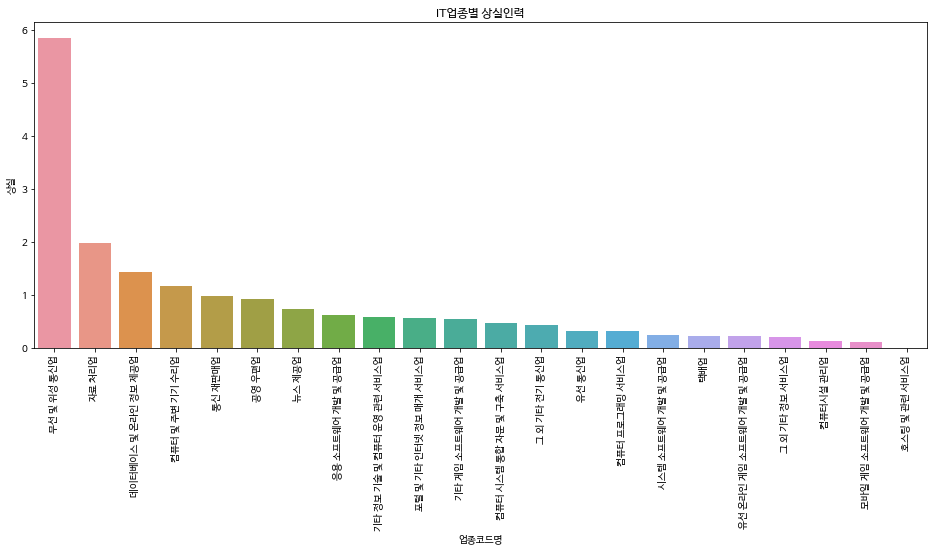

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_bot100.index, y=df_bot100)
plt.title('IT업종별 상실인력')
plt.xticks(rotation=90)
plt.show()

업종별 상실 인력에 대한 **TOP 50 결과**입니다.

- 유선온라인 게임 소프트웨어개발 및 공급업의 경우엔 ,신규고용 창출에 비해 상실의 수치는 크지 않은것으로 보임
- 신규고용 창출의 top인 무선 및 위성통신업종의 경우엔, 특이하게도 상실의 경우에도 Top임
  - 유무선 기지국 건설 혹은 통신회선 설치로 인한 국민 연금 신규 및 상실이 대량으로 반복되는 구조인것으로 판단됨.

In [ ]:
df_IT.loc[df_IT['업종코드']=='642001',['사업장명', '업종코드명', '신규', '상실', '고지금액', '인당고지금액']]

,사업장명,업종코드명,신규,상실,고지금액,인당고지금액
3479,케이티,무선 및 위성 통신업,15,76,9961182900,442188.61
3481,에스케이텔레콤,무선 및 위성 통신업,43,37,2400608900,440721.30
3579,케이티파워텔,무선 및 위성 통신업,1,0,63229120,448433.48
3932,케이디디아이코리아,무선 및 위성 통신업,3,1,20392060,351587.24
4451,케이티링커스,무선 및 위성 통신업,4,7,163318140,384277.98
4943,에스케이텔링크,무선 및 위성 통신업,0,0,91486520,444109.32
12843,케이티아이에스,무선 및 위성 통신업,199,225,1753229620,221955.90
13715,온산,무선 및 위성 통신업,0,0,2217960,277245.00
14747,인터콜,무선 및 위성 통신업,0,0,2591520,185108.57
22185,굿텔레콤,무선 및 위성 통신업,1,0,2326820,258535.56


## 업종별 단일 회사 연봉 비교 차트 그리기

In [95]:
df = pd.read_csv('/content/sample_data/national_pension_20200824.csv', encoding='CP949')
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',
          ]

df.columns = columns      
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df['평균월급'] = df['인당고지금액'] / 9 * 100
df['평균연봉'] = df['평균월급'] * 12


# code = df[df['사업장명']== '다인커머스']['업종코드']
# cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
# for v in code.item():
#   print(v,end='')


# filtered = df.loc[df['업종코드']=='642001'][cols]

# df_company = df.loc[df['사업장명'] == '다인커머스'][cols]
# filtered.mean()
# df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
# df_company

In [98]:
def compare_and_visualize(company):
    code = df[df['사업장명'] == company]['업종코드']
    cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
    filtered = df.loc[df['업종코드']==code.item()][cols]
    df_company = df.loc[df['사업장명'] == company][cols]
    df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
    
    compare_cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실']
    for col in compare_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=[company, '업종평균'], y=col, data=df_company)
        plt.title('{} vs 업종평균'.format(col), fontsize=18)
        plt.show()

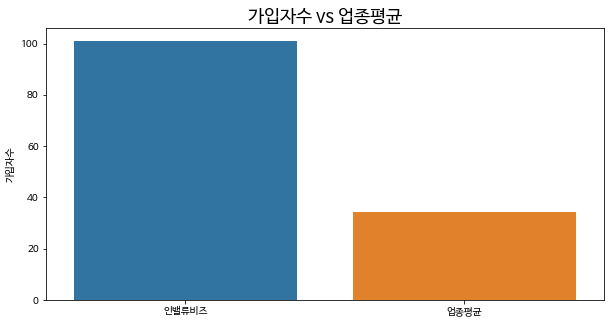

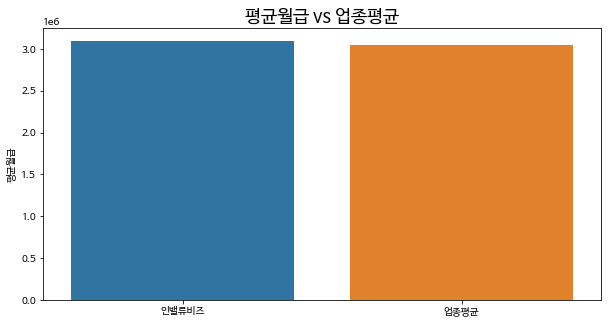

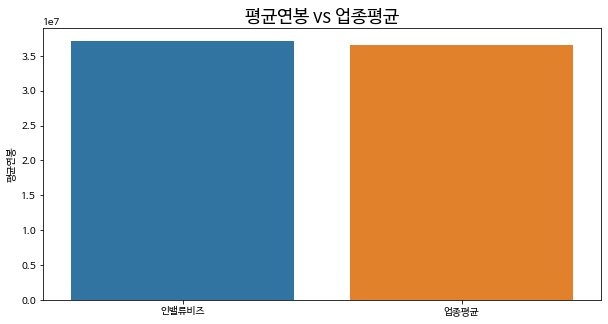

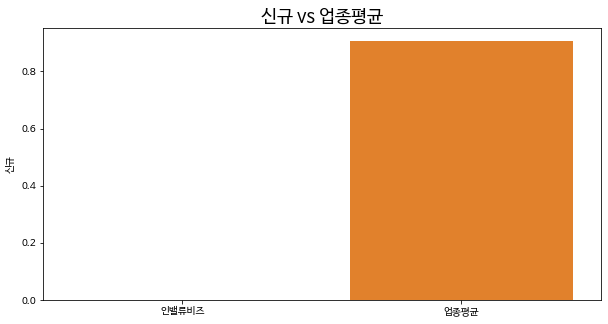

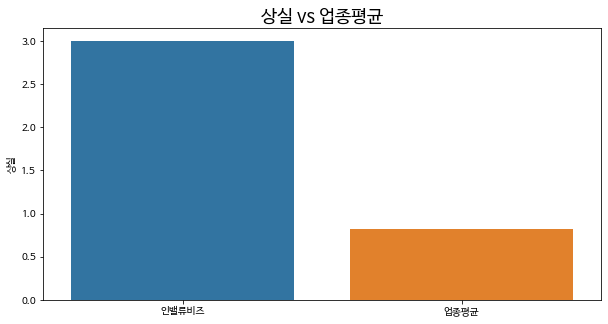

In [107]:
compare_and_visualize('인밸류비즈')

## 국민연금 상실/취득으로 본 업종별 추이 분석 프로젝트에 향후 과제

### ToDO List
  * 신규 / 상실이 대규모로 발생하는 경우의 주가 추이 확인(상장회사에 한함)
    * 주식 정보 스클롤링
  * 추가적으로 도출되는 항목 업데이트 예정.